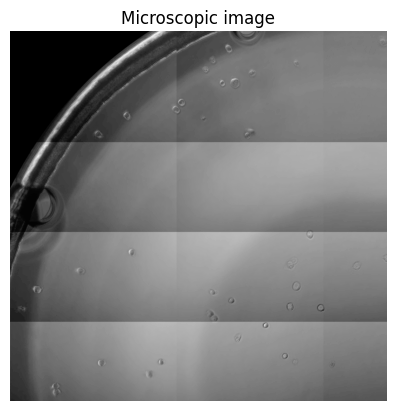

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

%matplotlib inline

# Reading in the input image and converting it to numpy array.
# It is grayscale so don't need to convert it.
gray = Image.open('../data/B2_0_0.jpg')
gray = np.asarray(gray)

# Showing the microscopic image with matplotlib.
plt.axis("off");
plt.title("Microscopic image");
plt.imshow(gray, cmap="gray");

In [ ]:
%pip install opencv-python

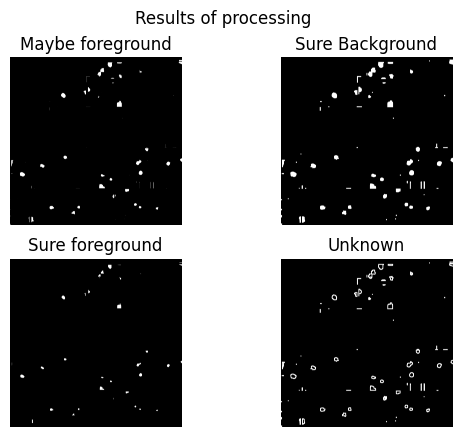

In [9]:
import cv2 as cv

# Thresholding the image.
m_foreground = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY_INV, 31, 7)

# Trying to differentiate foreground from background.
h_kernel = cv.getStructuringElement(cv.MORPH_RECT, (25, 1))
v_kernel = cv.getStructuringElement(cv.MORPH_RECT, (1, 25))
m_foreground = cv.morphologyEx(m_foreground, cv.MORPH_CLOSE, h_kernel, iterations=4)
m_foreground = cv.morphologyEx(m_foreground, cv.MORPH_CLOSE, v_kernel, iterations=4)
m_foreground = cv.morphologyEx(m_foreground, cv.MORPH_TOPHAT, h_kernel, iterations=5)
m_foreground = cv.morphologyEx(m_foreground, cv.MORPH_TOPHAT, v_kernel, iterations=5)

# Calculating the background sure of by dilating.
sure_bg = cv.dilate(m_foreground, np.ones((5, 5)), iterations=4)

# Calculating the sure foreground.
dist_transform = cv.distanceTransform(m_foreground, cv.DIST_L2, 5)
ret, sure_fg = cv.threshold(dist_transform, 0.2 * dist_transform.max(), 255, 0)
sure_fg = np.uint8(sure_fg)

# Calculating the unknown region.
unknown = cv.subtract(sure_bg,sure_fg)

# Plotting the results.
fig, ax = plt.subplots(nrows=2, ncols=2);

fig.suptitle("Results of processing")

ax[0][0].axis("off");
ax[0][0].set_title("Maybe foreground");
ax[0][0].imshow(m_foreground, cmap="gray");

ax[0][1].axis("off");
ax[0][1].set_title("Sure Background");
ax[0][1].imshow(sure_bg, cmap="gray");

ax[1][0].axis("off");
ax[1][0].set_title("Sure foreground");
ax[1][0].imshow(sure_fg, cmap="gray");

ax[1][1].axis("off");
ax[1][1].set_title("Unknown");
ax[1][1].imshow(unknown, cmap="gray");

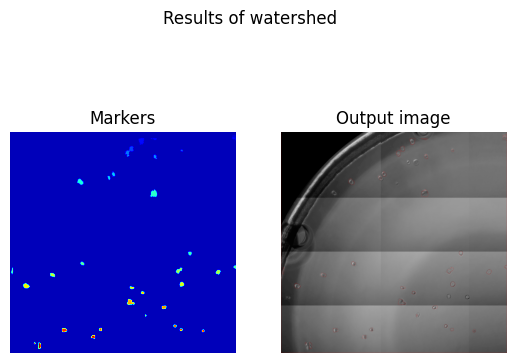

In [10]:
# Need to convert image from gray to bgr for watershed.
img = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)

# Applying the watershed algorithm.
ret, markers = cv.connectedComponents(sure_fg)
markers = markers+1
markers[unknown==255] = 0

markers = cv.watershed(img, markers)
img[markers == -1] = [255,0,0]

# Plotting the results.
fig, ax = plt.subplots(ncols=2);

fig.suptitle("Results of watershed");

ax[0].axis("off");
ax[0].set_title("Markers");
ax[0].imshow(markers, cmap="jet");

ax[1].axis("off");
ax[1].set_title("Output image");
ax[1].imshow(img);